In [2]:
## Importing Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [125]:
## Reading CSV File
df = pd.read_csv(r'C:\Users\dybro\Downloads\Forestry_Planting_Spaces.csv')

In [126]:
df

,OBJECTID,Borough,Number,Street,PSSite,PlantingSpaceOnStreet,Width,Length,ParkName,ParkZone,...,Jurisdiction,OverheadUtilities,TreeGuard,Latitude,Longitude,Census Tract,BIN,BBL,NTA,Location
0,9701378,Brooklyn,NaN,NaN,Park,NaN,0.0,0.0,Tiger Playground,B307,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.68845909478627, -73.91120558943786)"
1,283721,Brooklyn,62,RIVER STREET,Street,NaN,0.0,0.0,NaN,NaN,...,NaN,0,NaN,40.717009,-73.965972,555.0,3251740.0,3.023770e+09,North Side-South Side,"(40.7170044224351, -73.96604672738178)"
2,3727311,Brooklyn,NaN,NaN,Park,NaN,0.0,0.0,Prospect Park,B073-ZN04,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.662736676204446, -73.9770925110532)"
3,7113739,Brooklyn,NaN,NaN,Park,NaN,0.0,0.0,Asser Levy Park,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.574452132266146, -73.97180384184342)"
4,7669836,Queens,NaN,NaN,Park,NaN,0.0,0.0,Astoria Park,Q004-ZN02,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.77755788002656, -73.9234983173634)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014382,5687701,Queens,NaN,NaN,Park,NaN,0.0,0.0,Motor Parkway,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.73670422252658, -73.75469900942785)"
1014383,2850937,Staten Island,3858,VICTORY BOULEVARD,Street,1A,0.0,0.0,NaN,NaN,...,NaN,0,NaN,40.596106,-74.183438,29102.0,5041608.0,5.026100e+09,New Springville-Bloomfield-Travis,"(40.59618753432332, -74.18321819256549)"
1014384,1595183,Queens,49-38,HORATIO PARKWAY,Street,NaN,0.0,0.0,NaN,NaN,...,NaN,0,NaN,40.758514,-73.754340,138501.0,4161042.0,4.075000e+09,Oakland Gardens,"(40.758378296457366, -73.75429662093848)"
1014385,1605497,Queens,29-03,210 PLACE,Street,NaN,0.0,0.0,NaN,NaN,...,NaN,0,NaN,40.774126,-73.778696,1093.0,4134602.0,4.060500e+09,Bayside-Bayside Hills,"(40.77420663795524, -73.77866441217851)"


In [9]:
scaler = StandardScaler()

In [139]:
df[['Latitude_T','Longitude_T']] = scaler.fit_transform(df[['Latitude','Longitude']])

In [145]:
df_T= df.filter(['OBJECTID','PSSite','Borough','Latitude','Longitude','Latitude_T','Longitude_T'])

In [147]:
df_T=df_T.dropna(subset=['Latitude','Longitude'])

In [148]:
df_T

,OBJECTID,PSSite,Borough,Latitude,Longitude,Latitude_T,Longitude_T
1,283721,Street,Brooklyn,40.717009,-73.965972,0.184313,-0.324070
18,6795925,Street,Queens,40.701994,-73.776249,0.019944,1.212250
27,5019824,Street,Queens,40.796071,-73.827428,1.049804,0.797818
39,8598882,Street,Queens,40.699035,-73.804728,-0.012448,0.981636
52,4959924,Street,Queens,40.693682,-73.791797,-0.071047,1.086347
...,...,...,...,...,...,...,...
1014379,3984262,Street,Queens,40.688336,-73.780265,-0.129570,1.179730
1014383,2850937,Street,Staten Island,40.596106,-74.183438,-1.139210,-2.085045
1014384,1595183,Street,Queens,40.758514,-73.754340,0.638668,1.389663
1014385,1605497,Street,Queens,40.774126,-73.778696,0.809572,1.192435


In [176]:
def optimise_k_means(data, max_k):
    means = []
    distances = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        distances.append(kmeans.inertia_)
        
    fig =plt.subplots(figsize=(10,5)) 
    plt.plot(means, distances, 'o-')
    plt.title("Elbow Method")
    plt.xlabel("Number Of Clusters")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()
    

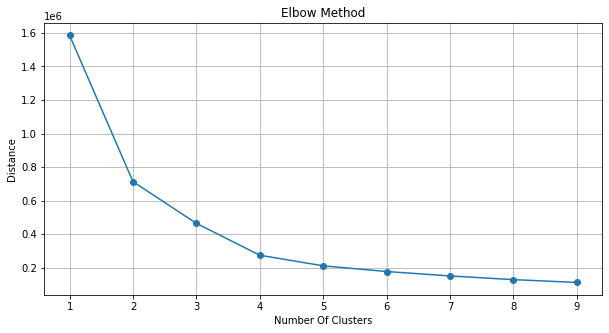

In [177]:
optimise_k_means(df_T[['Latitude_T','Longitude_T']],10)

In [153]:
kmeans = KMeans(n_clusters=5)

In [154]:
kmeans.fit(df_T[['Latitude_T','Longitude_T']])

KMeans(n_clusters=5)

In [158]:
df_T['kmeans_3']= kmeans.labels_

C:\Users\dybro\AppData\Local\Temp\ipykernel_15728\1638251043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T['kmeans_3']= kmeans.labels_


In [159]:
df_T

,OBJECTID,PSSite,Borough,Latitude,Longitude,Latitude_T,Longitude_T,kmeans_3
1,283721,Street,Brooklyn,40.717009,-73.965972,0.184313,-0.324070,0
18,6795925,Street,Queens,40.701994,-73.776249,0.019944,1.212250,2
27,5019824,Street,Queens,40.796071,-73.827428,1.049804,0.797818,4
39,8598882,Street,Queens,40.699035,-73.804728,-0.012448,0.981636,2
52,4959924,Street,Queens,40.693682,-73.791797,-0.071047,1.086347,2
...,...,...,...,...,...,...,...,...
1014379,3984262,Street,Queens,40.688336,-73.780265,-0.129570,1.179730,2
1014383,2850937,Street,Staten Island,40.596106,-74.183438,-1.139210,-2.085045,1
1014384,1595183,Street,Queens,40.758514,-73.754340,0.638668,1.389663,2
1014385,1605497,Street,Queens,40.774126,-73.778696,0.809572,1.192435,2


In [150]:
df_T[df_T['PSSite'].isnull()]

,OBJECTID,PSSite,Borough,Latitude,Longitude,Latitude_T,Longitude_T
21607,7937531,NaN,Bronx,40.839463,-73.885139,1.524816,0.330492
30458,8138325,NaN,Bronx,40.882975,-73.858346,2.001141,0.547453
31580,7285158,NaN,Queens,40.728461,-73.809043,0.309678,0.946694
42208,7874031,NaN,Queens,40.693912,-73.849325,-0.068529,0.620503
65392,8261843,NaN,Brooklyn,40.638354,-73.884452,-0.676722,0.336055
221558,8465952,NaN,Brooklyn,40.680598,-73.908098,-0.214277,0.144577
264286,8674298,NaN,Bronx,40.840011,-73.878637,1.530815,0.383143
287045,7727576,NaN,Bronx,40.864077,-73.859670,1.794265,0.536732
334710,7526172,NaN,Brooklyn,40.696162,-73.988096,-0.043899,-0.503223
338604,297909,NaN,Manhattan,40.824822,-73.950633,1.364541,-0.199859


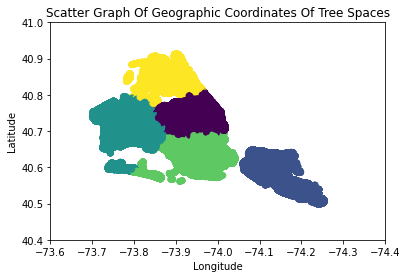

In [163]:
plt.scatter(x=df_T['Longitude'],y=df_T['Latitude'],c=df_T['kmeans_3'])
plt.xlim(-73.6,-74.4)
plt.ylim(40.4,41)
plt.title("Scatter Graph Of Geographic Coordinates Of Tree Spaces")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [162]:
print("Cluster    Total    Percent")
Arr = [0,1,2,3,4]
total = len(df_T);
for x in Arr:
    df_count = df_T.loc[df_T['kmeans_3'] == x]
    y=len(df_count);
    yp=100*y/total;
    yp_r = round(yp, 3);
    print(str(x) + '   ' + str(y) +'    '+ str(yp_r) +'%');

Cluster    Total    Percent
0   150832    19.029%
1   124804    15.745%
2   203979    25.734%
3   183266    23.121%
4   129755    16.37%


In [161]:
Arr = [0,1,2,3,4]
total = len(df_T);
for x in Arr:
    df_count = df_T.loc[df_T['kmeans_3'] == x]
    print("Cluster number :" +  str(x))
    print("Number of Diffrent Boroughs")
    print(df_count['Borough'].value_counts())
    print("")
    print("Number Parks and Streets")
    print(df_count['PSSite'].value_counts())
    print("-------------------------------------------------")

Cluster number :0
Number of Diffrent Boroughs
Queens       66264
Manhattan    53346
Brooklyn     31222
Name: Borough, dtype: int64

Number Parks and Streets
Street    150725
Park         105
Name: PSSite, dtype: int64
-------------------------------------------------
Cluster number :1
Number of Diffrent Boroughs
Staten Island    124803
Name: Borough, dtype: int64

Number Parks and Streets
Street    124749
Park          55
Name: PSSite, dtype: int64
-------------------------------------------------
Cluster number :2
Number of Diffrent Boroughs
Queens      201574
Brooklyn      2391
Name: Borough, dtype: int64

Number Parks and Streets
Street    203934
Park          43
Name: PSSite, dtype: int64
-------------------------------------------------
Cluster number :3
Number of Diffrent Boroughs
Brooklyn     176973
Queens         6291
Manhattan         1
Name: Borough, dtype: int64

Number Parks and Streets
Street    183155
Park         108
Name: PSSite, dtype: int64
---------------------------

In [119]:
print("Number of Diffrent Boroughs")
print(df_T['Borough'].value_counts())
print("")
print("Number Parks and Streets")
print(df_T['PSSite'].value_counts())
print("-------------------------------------------------")

Number of Diffrent Boroughs
Queens           282753
Brooklyn         210582
Staten Island    124803
Bronx            101737
Manhattan         72730
Name: Borough, dtype: int64

Number Parks and Streets
Street    792202
Park         403
Name: PSSite, dtype: int64
-------------------------------------------------


In [120]:
print("Number of Diffrent Boroughs")
print(df['Borough'].value_counts())
print("")
print("Number Parks and Streets")
print(df['PSSite'].value_counts())
print("-------------------------------------------------")

Number of Diffrent Boroughs
Queens           343996
Brooklyn         267109
Bronx            148337
Staten Island    144720
Manhattan        109711
Name: Borough, dtype: int64

Number Parks and Streets
Street    822954
Park      191403
Name: PSSite, dtype: int64
-------------------------------------------------
